## Observations and Insights 

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata.head())
# print(study_results.head())
# Combine the data into a single dataset
cms = pd.merge(mouse_metadata,study_results, how="left", on="Mouse ID")

# Display the data table for preview
display(cms)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice.
cms["Mouse ID"].nunique()

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#print(cms["Mouse ID"].value_counts())

cms.loc[cms.duplicated(), :]

#cms[cms["Mouse ID"]==cms.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 

dupmouse=cms.loc[cms.duplicated(), :]
dupmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleancms= cms.drop(index=dupmouse.index)
cleancms
# duplicate_mouse_ids = cms.loc[cms.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# duplicate_mouse_ids
# cleancms = cms.drop(duplicate_mouse_ids)
# cleancms

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
UniqueMouse = cleancms["Mouse ID"].nunique()
UniqueMouse

249

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleancms.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen
# mean, median, variancstandard deviation, and SEM of the tumor volume. 
dmean = cleancms.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
dmean
dmedian = cleancms.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
dmedian
dvar = cleancms.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
dvar
dstd = cleancms.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
dstd
dsem = cleancms.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
dsem

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean Tumor Volume": dmean,"Median Tumor Volume": dmedian,"Tumor Volume Variance": dvar,"Tumor Volume Std. Dev.": dstd,"Tumor Volume Std. Err.": dsem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
SumTable = cms.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
SumTable


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# group by drug type
drugtype = cms.groupby("Drug Regimen")
drugtype
umdc = drugtype["Mouse ID"].count()
umdc

# bar = umdc.plot(kind="bar", title = "Unique Mice per Drug Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Unique Mouse Count")
# # bar.set.xlabel("Drug Regimen")
# # bar.set.ylabel("Unique Mouse Count")
# plt.show()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

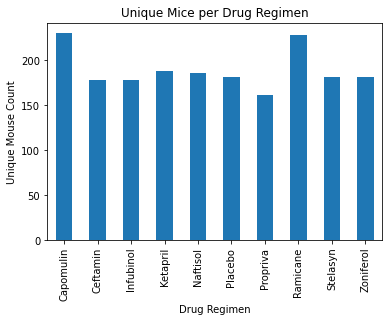

<Figure size 432x288 with 0 Axes>

In [150]:
bar = umdc.plot(kind="bar", title = "Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mouse Count")
# bar.set.xlabel("Drug Regimen")
# bar.set.ylabel("Unique Mouse Count")
plt.show()
plt.savefig('barplot')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(cms.groupby(["Sex"]).count())
gender
# mousegender= pd.DataFrame(gender(["Sex"]).count())
# mousegender
totmouse=cms["Mouse ID"].count()
totmouse
pecgender = gender/totmouse
pecgender


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,0.493925,0.493925,0.493925,0.493925,0.493925,0.493925,0.493925
Male,0.506075,0.506075,0.506075,0.506075,0.506075,0.506075,0.506075


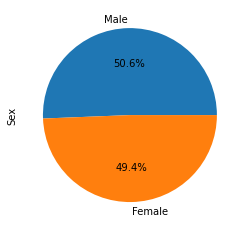

In [151]:
# gender = pd.DataFrame(cms[["Mouse ID","Sex"]]).value_counts()
# gender
# # mouse=pd.DataFrame(gender.groupby(["Sex"]).count())
# # mouse
# # totmouse=cms["Mouse ID"].count()
# # totmouse
# genderpec = gender/totmouse
# genderpec.plot(kind="pie")
# # genderpec.plot.pie(y='mouse', figsize=(5, 5))
# # #ie(mouse)
# # # mouse.plot.pie
# # # plt.show()
# # mouse.plot(kind = "pie", y="Sex")
# # plt.show()
gender=cleancms["Sex"].value_counts()
gender
gender.plot(kind="pie",autopct = "%1.1f%%")
plt.savefig("pieplot")

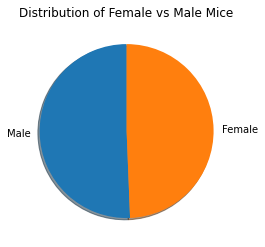

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleancms["Sex"].value_counts()

plt.pie (gender, labels=gender.index,  shadow=True, startangle = 90)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#cms_filter = cms[cms['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# for i in cms_filter['Mouse ID']:
#     display(cms_filter.loc[cms_filter['Mouse ID'] == i])



# # cms_grouped = cms_filter.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].agg('count')
# # cms_df = pd.DataFrame(cms_grouped)
# # cms_df = cms_df.reset_index()

# # Start by getting the last (greatest) timepoint for each mouse
# mxtumor = cleancms.groupby(["Mouse ID"])["Timepoint"].max()
# #print(mxtumor)

# mxtumor_df = pd.DataFrame(mxtumor)

# #print(mxtumor_df)
 
# #cms_merged = cms_filter.merge(mxtumor, how='left', on='Mouse ID')
# max_timepoint = cms_merged[cms_merged['Timepoint_x'] == cms_merged['Timepoint_y']].copy()
# max_timepoint['Final Tumor Volume'] = max_timepoint['Tumor Volume (mm3)']
# max_timepoint[max_timepoint['Timepoint_x'] == max_timepoint['Timepoint_y']]
# max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


NameError: name 'cms_merged' is not defined

In [67]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(cleancms.groupby("Mouse ID").max()["Timepoint"])
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(cleancms, max_timepoint_df, on = "Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = cleancms.loc[cleancms["Drug Regimen"] == "Capomulin",:]
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [53]:
# Start by getting the last (greatest) timepoint for each mouse
capmaxtumor =cap_df.groupby("Mouse ID").max()["Timepoint"]
capmaxtumor.head(5)


Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
Name: Timepoint, dtype: int64

In [46]:
ram_df = cleancms.loc[cleancms["Drug Regimen"] == "Ramicane",:]
ram_df

ramtumor = ram_df.groupby("Mouse ID").max()["Timepoint"]
ramtumor.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [47]:
inf_df = cleancms.loc[cleancms["Drug Regimen"] == "Infubinol",:]
inf_df

inftumor =inf_df.groupby("Mouse ID").max()["Timepoint"]
inftumor.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [50]:
cer_df = cleancms.loc[cleancms["Drug Regimen"] == "Ceftamin",:]
cer_df

certumor =cer_df.groupby("Mouse ID").max()["Timepoint"]
certumor.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [149]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# druglist = max_timepoint['Drug Regimen'].unique().tolist()
# display(druglist)

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drugs in drug:
# des_tumor = max_timepoint.describe()

# display(des_tumor['Final Tumor Volume'])
# q1 = des_tumor['Final Tumor Volume'].iloc[4]
# q3 = des_tumor['Final Tumor Volume'].iloc[6]
# lower_IQR = q1 - (1.5 * (q3 - q1))
# upper_IQR = q3 + (1.5 * (q3 - q1))
# IQR = (1.5 * (q3 - q1))

# max_timepoint[(max_timepoint['Final Tumor Volume'] > upper_IQR)]
# max_timepoint[(max_timepoint['Final Tumor Volume'] < lower_IQR)]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in druglist:
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    # add subset 
    volume_df = drug_df.loc[drug_df["Timepoint_x"] == drug_df["Timepoint_y"]]
    value = volume_df["Tumor Volume (mm3)"]
    tumorvoldata.append(value)

    
#Determine outliers using upper and lower bounds
    quartiles = value.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}:{iqr}')
    lower = lowerq -(1.5*iqr)
    upper = upperq + (1.5*iqr)
    #outliers = (value.loc[(volume_df["Tumor Volume (mm3)"] >= upper, volume_df["Tumor Volume (mm3)"] <=lower).count()

print(f'Values below {lower} could be outliers.')
print(f'Values above {upper} could be outliers.')
    

IQR for Capomulin:7.781863460000004
IQR for Ramicane:9.098536719999998
IQR for Infubinol:11.477135160000003
IQR for Ceftamin:15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


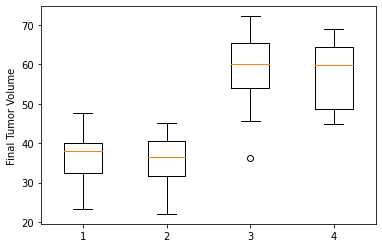

<Figure size 432x288 with 0 Axes>

In [152]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorvoldata)
plt.ylabel("Final Tumor Volume")
plt.show()
plt.savefig('boxplot')

## Line and Scatter Plots

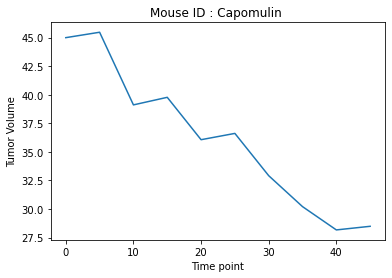

<Figure size 432x288 with 0 Axes>

In [153]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capmouse = cms.loc[cms["Mouse ID"] =="x401"]

#line plots
plt.plot(Capmouse["Timepoint"], Capmouse["Tumor Volume (mm3)"])
plt.xlabel("Time point")
plt.ylabel("Tumor Volume")
plt.title("Mouse ID : Capomulin ")
plt.show()
plt.savefig('lineplot')


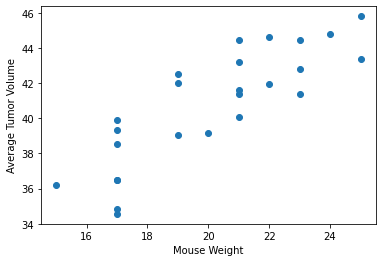

<Figure size 432x288 with 0 Axes>

In [154]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgcap = cap_df.groupby(["Mouse ID"]).mean()
avgcap

x_values = avgcap["Weight (g)"]
#print(x_values) 
y_values = avgcap["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()
plt.savefig("Scatterplot")



## Correlation and Regression

In [143]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(x_values, y_values)[0],2)
correlation
print(f'The correlation between mouse weight and tumor volume is {correlation}')





The correlation between mouse weight and tumor volume is 0.84


In [145]:
linear = st.linregress(x_values, y_values)
print(linear)
linear_df = pd.DataFrame(linear)
linear_df
mslope= linear [0]
print(f'The Slope is {mslope}')
bintercept = linear [1]
print(f'The intercept is {bintercept}')


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)
The Slope is 0.9544396890241045
The intercept is 21.552160532685015


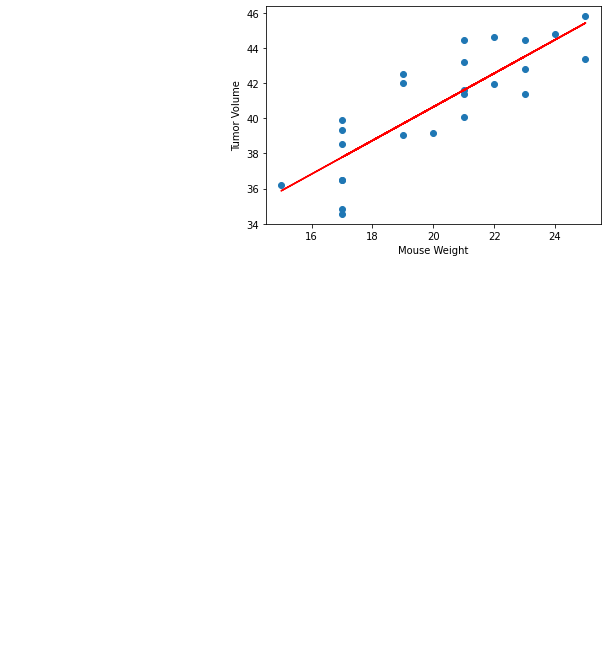

<Figure size 432x288 with 0 Axes>

In [155]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
st.regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
plt.savefig("linearregression")